# За основу взят датасет о потреблении ресурсов разными регионами облачной платформы за определённые даты времени.

Загрузим его и проведём необходимые манипуляции, что бы привести его к лучшему виду, а затем исследуем эти данные.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
# Загрузим наш датасет с ресурсами
dataset = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/my_csv.csv', delimiter=',')#, header=None).values #index_col=False

In [413]:
#Отобразим его
dataframe = pd.DataFrame(dataset)
dataframe.info()
dataframe
# resource_pool уже был ранее перекодирован из строковых значений
# с помощью функции LabelEncoder() 
# Что бы анонимизировать данные перед работой с ними

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
Unnamed: 0            454 non-null int64
Date                  454 non-null object
resource_pool         454 non-null int64
VCPU, quota           454 non-null int64
VCPU, Allocated       454 non-null float64
VCPU, Used            454 non-null float64
RAM, quota            454 non-null int64
RAM, Allocated        454 non-null int64
RAM, Used             454 non-null float64
Storage, quota        454 non-null int64
Storage, Allocated    454 non-null int64
Storage, Used         454 non-null float64
dtypes: float64(4), int64(7), object(1)
memory usage: 42.7+ KB


,Unnamed: 0,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
0,0,2019.12.02,0,3200,1152.0,36.000000,32756,3798,11.594822,102395,49519,48.360760
1,1,2019.12.02,1,11200,9453.0,84.401786,54017,35531,65.777440,591000,504770,85.409475
2,2,2019.12.02,2,6448,5515.0,85.530397,46506,21171,45.523158,372234,289444,77.758614
3,3,2019.12.02,3,61410,51233.0,83.427780,633358,208078,32.853142,3307535,2600949,78.637082
4,4,2019.12.02,4,39323,38548.0,98.029143,224953,164402,73.082822,3002226,2346392,78.155076
...,...,...,...,...,...,...,...,...,...,...,...,...
449,449,2019.05.20,13,14400,0.0,0.000000,147397,0,0.000000,563170,0,0.000000
450,450,2019.05.20,14,1600,0.0,0.000000,16377,0,0.000000,76796,0,0.000000
451,451,2019.05.20,15,1600,0.0,0.000000,16377,0,0.000000,35838,0,0.000000
452,452,2019.05.20,16,2122,426.0,20.075401,14482,3100,21.405883,280653,42466,15.131141


In [415]:
# Поменяем колонки на имена из первой строки и уберём ненужную строку
# Заменим индекс на первый столбец

# a = df[:1:].values
df = dataframe.copy()
# df[df.columns[0]]
# l = df.iloc[:,0].values
          # index=list(l))
# df.columns = list(df[:1:].values)
# df = df.drop([0], axis=0)
print(df.columns[0])
print(df[df.columns[0]].values)
print(df[df.columns[0]].values.astype(int))

# df.index = list(df)
df.index = df[df.columns[0]].values.astype(int)
# df.reset_index(drop=True)
# print(df)
# print(df.columns)
# df.set_index(dataframe[NaN], inplace=True)
df = df.drop(df.columns[0], axis=1)
df.head(10)



Unnamed: 0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
0,2019.12.02,0,3200,1152.0,36.000000,32756,3798,11.594822,102395,49519,48.360760
1,2019.12.02,1,11200,9453.0,84.401786,54017,35531,65.777440,591000,504770,85.409475
2,2019.12.02,2,6448,5515.0,85.530397,46506,21171,45.523158,372234,289444,77.758614
3,2019.12.02,3,61410,51233.0,83.427780,633358,208078,32.853142,3307535,2600949,78.637082
4,2019.12.02,4,39323,38548.0,98.029143,224953,164402,73.082822,3002226,2346392,78.155076
5,2019.12.02,5,48200,34824.0,72.248963,493318,190570,38.630255,1870677,1322543,70.698629
6,2019.12.02,6,20840,20431.0,98.037428,127567,92477,72.492886,1918603,1376144,71.726355
7,2019.12.02,7,3200,34.0,1.062500,32761,120,0.366289,102395,560,0.546902
8,2019.12.02,8,3200,947.0,29.593750,32754,4597,14.034927,148472,36518,24.595883
9,2019.12.02,9,48000,6763.0,14.089583,491267,38482,7.833215,1750952,296643,16.941812


In [416]:
df = shuffle(df) #перетосуем
df

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
157,2019.10.14,13,39200,31291.0,79.823980,401243,158553,39.515456,1551277,1210387,78.025201
232,2019.09.09,9,25600,9433.0,36.847656,261973,55029,21.005600,1085384,434778,40.057528
85,2019.11.11,20,421,335.0,79.572447,3091,1645,53.219023,27698,14118,50.971189
191,2019.09.30,13,40800,29027.0,71.144608,417621,144313,34.555973,1602474,1139262,71.093946
161,2019.10.14,18,18800,6945.0,36.941489,192369,33037,17.173765,706524,232549,32.914522
...,...,...,...,...,...,...,...,...,...,...,...
438,2019.05.27,15,1600,0.0,0.000000,16377,0,0.000000,35838,0,0.000000
329,2019.07.22,8,3200,376.0,11.750000,32754,1624,4.958173,143352,10912,7.612032
178,2019.10.07,16,5647,3711.0,65.716310,56254,27569,49.008071,646828,366019,56.586759
4,2019.12.02,4,39323,38548.0,98.029143,224953,164402,73.082822,3002226,2346392,78.155076


In [427]:
from sklearn import preprocessing

# dataframe = pd.DataFrame(df)
# dataframe.info()

# First 15 rows of our dataset.
print(dataframe.head(15))

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_dataframe, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_dataframe.head() 


    Unnamed: 0        Date  ...  Storage, Allocated  Storage, Used
0            0  2019.12.02  ...               49519      48.360760
1            1  2019.12.02  ...              504770      85.409475
2            2  2019.12.02  ...              289444      77.758614
3            3  2019.12.02  ...             2600949      78.637082
4            4  2019.12.02  ...             2346392      78.155076
5            5  2019.12.02  ...             1322543      70.698629
6            6  2019.12.02  ...             1376144      71.726355
7            7  2019.12.02  ...                 560       0.546902
8            8  2019.12.02  ...               36518      24.595883
9            9  2019.12.02  ...              296643      16.941812
10          10  2019.12.02  ...               83900      97.558140
11          11  2019.12.02  ...               50725      99.950739
12          12  2019.12.02  ...               88269      49.260003
13          13  2019.12.02  ...             1150292      74.15

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
157,21,13,39200,31291.0,79.823980,401243,158553,39.515456,1551277,1210387,78.025201
232,16,9,25600,9433.0,36.847656,261973,55029,21.005600,1085384,434778,40.057528
85,25,20,421,335.0,79.572447,3091,1645,53.219023,27698,14118,50.971189
191,19,13,40800,29027.0,71.144608,417621,144313,34.555973,1602474,1139262,71.093946
161,21,18,18800,6945.0,36.941489,192369,33037,17.173765,706524,232549,32.914522


In [428]:
print(encoded_dataframe)
encoded_dataframe.describe()

     Date  resource_pool  ...  Storage, Allocated  Storage, Used
157    21             13  ...             1210387      78.025201
232    16              9  ...              434778      40.057528
85     25             20  ...               14118      50.971189
191    19             13  ...             1139262      71.093946
161    21             18  ...              232549      32.914522
..    ...            ...  ...                 ...            ...
438     1             15  ...                   0       0.000000
329     9              8  ...               10912       7.612032
178    20             16  ...              366019      56.586759
4      28              4  ...             2346392      78.155076
36     27             13  ...             1143077      73.686195

[454 rows x 11 columns]


,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02,4.540000e+02,454.000000
mean,15.526432,9.517621,11137.477974,7087.955947,51.649973,101959.878855,32221.768722,31.318225,5.736477e+05,3.550989e+05,46.503265
std,8.562610,6.045333,12336.963199,10204.442273,34.452693,122730.338372,45942.045032,25.823364,6.392293e+05,5.298224e+05,32.977974
min,0.000000,0.000000,21.000000,0.000000,0.000000,21.000000,0.000000,0.000000,2.100000e+03,0.000000e+00,0.000000
25%,8.000000,4.000000,2800.000000,505.000000,20.997768,28659.000000,2155.000000,9.064542,9.215500e+04,1.777075e+04,15.644516
50%,16.000000,9.000000,6000.000000,2090.000000,49.819188,46698.000000,10797.000000,27.535323,2.853020e+05,9.002000e+04,47.736686
75%,23.000000,15.000000,15440.000000,9181.000000,84.502985,135703.000000,39823.000000,49.443497,8.546920e+05,4.522575e+05,77.688569
max,28.000000,23.000000,61410.000000,51233.000000,126.579987,633358.000000,208078.000000,99.448529,3.307535e+06,2.600949e+06,101.132873


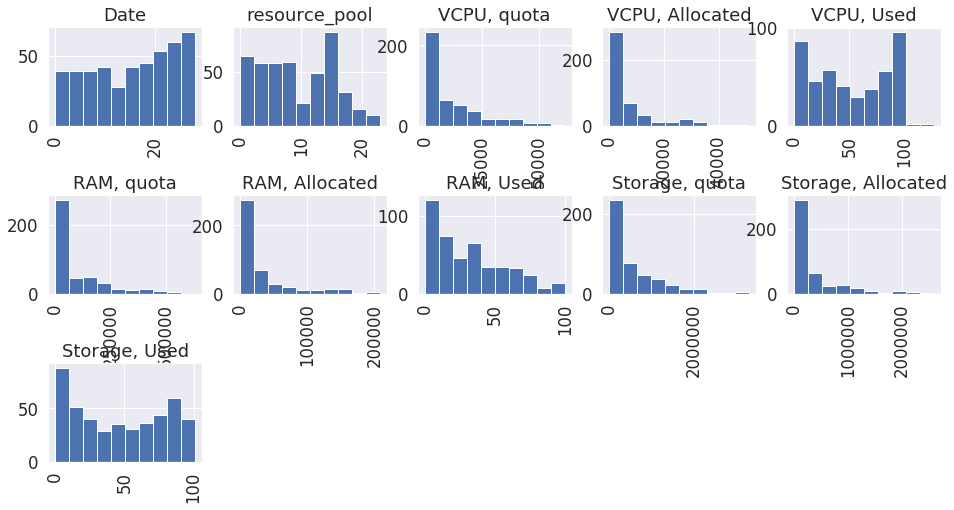

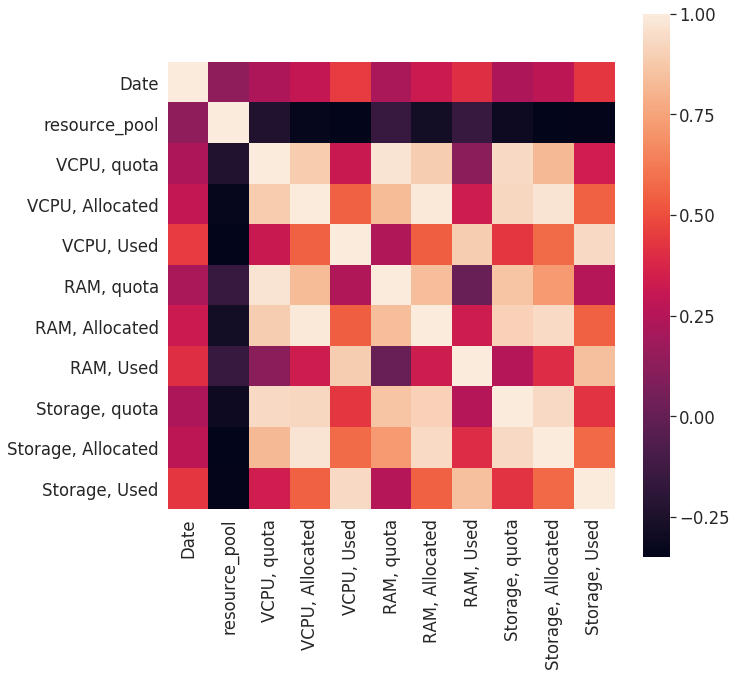


В числовом виде - таблица


,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
Date,1.000000,0.135498,0.225893,0.297184,0.446742,0.216808,0.320087,0.404462,0.227376,0.280558,0.434697
resource_pool,0.135498,1.000000,-0.230282,-0.330062,-0.348426,-0.153258,-0.282484,-0.155453,-0.306575,-0.350729,-0.342747
"VCPU, quota",0.225893,-0.230282,1.000000,0.889183,0.314887,0.971621,0.891479,0.117276,0.935701,0.820819,0.339439
"VCPU, Allocated",0.297184,-0.330062,0.889183,1.000000,0.551162,0.826058,0.988241,0.334604,0.928445,0.969211,0.550845
"VCPU, Used",0.446742,-0.348426,0.314887,0.551162,1.000000,0.233257,0.543960,0.893901,0.435108,0.581748,0.934276
"RAM, quota",0.216808,-0.153258,0.971621,0.826058,0.233257,1.000000,0.838404,0.009162,0.857943,0.720964,0.255985
"RAM, Allocated",0.320087,-0.282484,0.891479,0.988241,0.543960,0.838404,1.000000,0.334211,0.907524,0.941222,0.546705
"RAM, Used",0.404462,-0.155453,0.117276,0.334604,0.893901,0.009162,0.334211,1.000000,0.254390,0.399513,0.843164
"Storage, quota",0.227376,-0.306575,0.935701,0.928445,0.435108,0.857943,0.907524,0.254390,1.000000,0.936121,0.419957
"Storage, Allocated",0.280558,-0.350729,0.820819,0.969211,0.581748,0.720964,0.941222,0.399513,0.936121,1.000000,0.573448


In [429]:
# Построим графики что бы увидеть распределение величин
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_dataframe.shape[1]) / cols)
for i, column in enumerate(encoded_dataframe.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_dataframe[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Посмотрим, какие присутствуют корреляции

def show_heat_map(dataframe):
  plt.subplots(figsize=(10,10))
  sns.heatmap(dataframe.corr(), square=True)
  plt.show()

# отобразим нашу карту корреляций
show_heat_map(encoded_dataframe)


In [0]:
# encoded_dataframe.drop(columns=['2', '', '13'], axis=0, inplace=True)
# show_heat_map(encoded_dataframe)
# print('\nВ числовом виде - таблица')
# encoded_dataframe.corr()
# Я решил не удалять корреляции и посмотреть, что будте с данными

Сильных корреляций не было выявлено.

Предсказывать будем "RAM, Allocated", то есть фактически использующиеся ресурсы оперативной памяти.
Выделим данный столбец в целевую переменную.

In [430]:
# Посмотрим наши колонки и выберем ту которую будем считаться за целевую переменную, а затем выбросим её из данных
print(df.columns)
print(df.columns[6]) # Ram 
print(df.columns[3]) # CPU
print(df.columns[0]) # Date? don't think so


# print(set(df[df.columns[6]])) Если нам захочется увидеть уникальные значения переменной и это будет целесообразно

# Кодировка one-hot на случай другой целевой переменной, которой она бдуте нужна. Данный метод лучше воспринимается алгоритмами
# y_targer = pd.get_dummies(y_targer)
# y_targer

# Выделим целевую переменную
y = encoded_dataframe[df.columns[6]].values
print(y)
print(y.shape)

encoded_dataframe.drop([df.columns[6]], axis=1, inplace = True)

Index(['Date', 'resource_pool', 'VCPU, quota', 'VCPU, Allocated', 'VCPU, Used',
       'RAM, quota', 'RAM, Allocated', 'RAM, Used', 'Storage, quota',
       'Storage, Allocated', 'Storage, Used'],
      dtype='object')
RAM, Allocated
VCPU, Allocated
Date
[158553  55029   1645 144313  33037  33114   2793   1024   8206   4915
   4501  20469      1   1645   4373   1629   9400  64896   1886  69284
      0 135836  14716  34995  26716  18313      0   2060  73335   1621
  25615  62136   1746  76423  46752   6553  26724  85090 163215   3481
      0  33469 115002 140008  42604   1725  44193      0   3777  38189
  71658  13412  93127   1834   1217  24434  27306  50430    104   1885
  68876   5904 104760      0  18392      0 175470  32231    892  50432
  22386 189146  91151  21841  35237      0  20219   4563   7269  11871
  14608  14660  66105  10983      0   9280   2548   7145   3729   2148
   3276   1507      1  50984   1024     24     29   6553    245   1024
  73475  28605  46148 175272 208078

In [431]:
# Нормализуем данные

X = encoded_dataframe.values.astype(np.float)
print(X.shape)
print(X, '\n')

X_without_normalizing = X.copy() # Оставим без нормализации для экспериментов

sc = sklearn.preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

(454, 10)
[[2.10000000e+01 1.30000000e+01 3.92000000e+04 ... 1.55127700e+06
  1.21038700e+06 7.80252012e+01]
 [1.60000000e+01 9.00000000e+00 2.56000000e+04 ... 1.08538400e+06
  4.34778000e+05 4.00575280e+01]
 [2.50000000e+01 2.00000000e+01 4.21000000e+02 ... 2.76980000e+04
  1.41180000e+04 5.09711893e+01]
 ...
 [2.00000000e+01 1.60000000e+01 5.64700000e+03 ... 6.46828000e+05
  3.66019000e+05 5.65867588e+01]
 [2.80000000e+01 4.00000000e+00 3.93230000e+04 ... 3.00222600e+06
  2.34639200e+06 7.81550756e+01]
 [2.70000000e+01 1.30000000e+01 3.93000000e+04 ... 1.55127700e+06
  1.14307700e+06 7.36861953e+01]] 



array([[ 0.63994584,  0.57667967,  2.27717945, ...,  1.53107463,
         1.61607308,  0.95690263],
       [ 0.05536755, -0.08571772,  1.17358511, ...,  0.80143511,
         0.15055429, -0.19567143],
       [ 1.10760847,  1.73587511, -0.86960621, ..., -0.85501712,
        -0.6442858 ,  0.13563154],
       ...,
       [ 0.52303018,  1.07347772, -0.44553385, ...,  0.11460834,
         0.02063367,  0.30610181],
       [ 1.45835544, -0.91371447,  2.28716048, ...,  3.80341983,
         3.7625627 ,  0.96084519],
       [ 1.34143979,  0.57667967,  2.28529411, ...,  1.53107463,
         1.48889035,  0.82518464]])

In [432]:
# Разделим на train и test выборки наши данные после того, как мы их обработали

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=14)
print(X_train)
print(y_train)
print('\n', X_test)
print(y_test)
print('\nНаш shape',X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')



# Стоит ли препроцессинг делать после разделения разделения на трейн и тест? Убедимся практическим путём
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

print('\n\nБез Нормализации:')
X_train_notNormolaze, X_test_notNormolaze, y_train_notNormolaze, y_test_notNormolaze = train_test_split(X_without_normalizing, y, test_size=0.35, random_state=0)
print(X_train_notNormolaze)
print(y_train_notNormolaze)
print('\n', X_test_notNormolaze)
print(y_test_notNormolaze)

X_train_preprocess = preprocessing.scale(X_train_notNormolaze)
print('\nЗначения после препроцессинга\n',X_train_preprocess)

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train_notNormolaze)
X_test_scaler = sc.transform(X_test_notNormolaze)
print(X_train_scaler)
print(X_test_scaler)

[[ 1.34143979  1.07347772 -0.48261787 ...  0.11460834  0.2078706
   0.77116185]
 [-1.69836732 -1.57611186 -0.67655835 ... -0.57767163 -0.6477436
  -1.22953742]
 [ 0.7568615   0.07988162 -0.78204898 ... -0.78720144 -0.5416251
   1.51495781]
 ...
 [ 0.28919886 -0.91371447  1.58004864 ...  2.47168477  2.84090077
   1.21027167]
 [ 1.22452413 -0.58251577  0.31992243 ...  0.85345971  1.20974023
   1.28947353]
 [-0.29537943 -0.08571772  0.91391585 ...  0.64107332 -0.50006728
  -1.13237697]]
[ 34615   1024   4223  56624 190570      0   2152  36814      0  13412
  26716  42839 189146    402   3873   2907  12376   1161   3779   4812
      0  27306    892    128  74840      0  34995   2541  35237   4915
  12877   2068   3729   9280 119253   8206   7145   4251   1360  28635
  91324   3276 175470    102   8473  38863   5328 154873   1621 120207
  18392   4149  12391   3323 205333  20469   2148   3481   1609  53907
  33993  10611  34499  14024  64896      0  21224  73475   9855  55852
  47282   2629

# Для начала построим модель логистической регрессией

In [433]:
# Импортируем библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Создадим экземпляр класса логистической регрессии и передадим в него обучающие выборки
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# После препроцессинга
logreg_preprocessing = LogisticRegression()
logreg_preprocessing.fit(X_train_preprocess, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# После скалирования
logreg_scaler = LogisticRegression()
logreg_scaler.fit(X_train_scaler, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Без нормализации
logreg_notNormolize = LogisticRegression()
logreg_notNormolize.fit(X_train_notNormolaze, y_train_notNormolaze)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Как видно из последнего примера - данные следует нормализовывать. Данный вариант отпадает.

In [434]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred               = logreg.predict(X_test) 
y_pred_preprocessing = logreg_preprocessing.predict(X_test) 
y_pred_scaler        = logreg_scaler.predict(X_test) 

print('Точность классификатора логистической регрессии на test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Точность классификатора логистической регрессии с препроцессингом на test set: {:.2f}'.format(logreg_preprocessing.score(X_test, y_test)))
print('Точность классификатора логистической регрессии со скалированием на test set: {:.2f}'.format(logreg_scaler.score(X_test, y_test)))


#Построим confusion matrix что бы увидеть точность по TP TN FP FN
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

# confusion_matrix_preprocessing = confusion_matrix(y_test, y_pred_preprocessing)
# print(confusion_matrix, '\n')

# confusion_matrix_scaler = confusion_matrix(y_test, y_pred_scaler)
# print(confusion_matrix, '\n')

# Выведем метрики наших классификаторов
print(classification_report(y_test, y_pred))
# print(classification_report(y_test, y_pred_preprocessing))
# print(classification_report(y_test, y_pred_scaler))

Точность классификатора логистической регрессии на test set: 0.08
Точность классификатора логистической регрессии с препроцессингом на test set: 0.05
Точность классификатора логистической регрессии со скалированием на test set: 0.05
[[8 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

              precision    recall  f1-score   support

           0       0.31      1.00      0.47         8
           1       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         0
         175       0.00      0.00      0.00         1
         245       0.00      0.00      0.00       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В ходе эксперимента с препроцессингом после разделения на трейн и тест стало ясно, что результаты точности намного ухудшились после препроцессинга после разделения. Следовательно так делать не стоит.

Так же мы удостоверились, что перемешивание датасета с помощью shuffle повышает точность.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


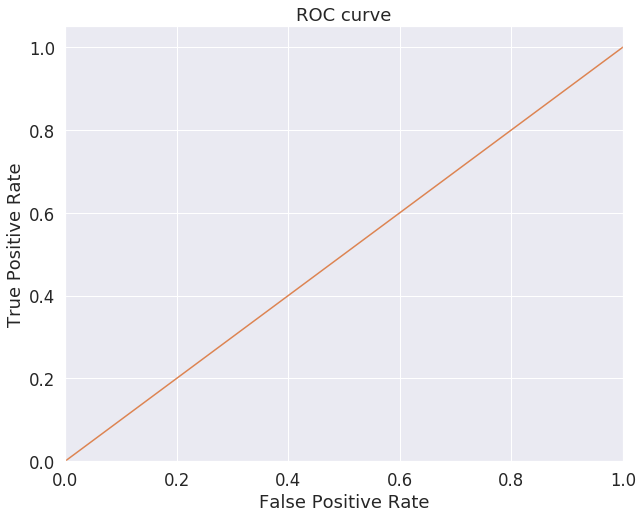

In [435]:
# Построим ROC кроивую для оценки модели в целом
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

При перемешивании логистическая регрессия реагирует не стабильно на этих данных, то имеет схожие показатели, то ниже. Влияние использования shuffle до конца не выявлено после 20 попыток перемешивания и не перемешивания данных.

In [436]:
from sklearn.linear_model import LogisticRegressionCV

# from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
print(X_scaled.shape)
print(y_train.shape)

# Скормим данные на которых она будет учиться
logReg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=70)
logReg_cv.fit(X_scaled.astype(object), y_train)


(295, 10)
(295,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

ValueError: ignored

In [0]:
# Выведем точность классификатора данной модели после кросс валидации

print('Оценка логистической регрессии:')
y_pred_cv = logReg_cv.predict(X_test)
print(logReg_cv.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

print(classification_report(y_test, y_pred_cv))

print('\nКак можем видеть точность выше чем у модели без кросс валидации')

In [0]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cv, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve after Cross Validation')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Странные вещи с Shape, после отрабатывания алгоритма, которых не было на других данных и другом датасете.
Реализация данного алгоритма на этом датасете откладывается

# Решающее дерево

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Создадим экземпляр решающего дерева и обучим его
classif_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [438]:
from sklearn.metrics import accuracy_score

# Предскажем значения
y_pred =  classif_tree.predict(X_test)

print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Точность модели на тестовых данных:  0.05660377358490566


In [439]:
# Используем кросс валидацию для поиска оптимальной глубины 'max_depth'
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
classif_tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv.fit(X_train, y_train)
tree_model = classif_tree_cv.best_estimator_
print (classif_tree_cv.best_score_, classif_tree_cv.best_params_) 

y_pred_tree_cv = classif_tree_cv.predict(X_test)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree_cv))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.18305084745762712 {'max_depth': 19}
Точность модели на тестовых данных:  0.11949685534591195
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


# Воспользуемся подходом с использованием bagging

0.06289308176100629

Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



               precision    recall  f1-score   support

           0       0.31      1.00      0.47         8
          56       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         0
         175       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         2
         301       0.00      0.00      0.00         2
         568       0.00      0.00      0.00         1
         721       0.00      0.00      0.00         0
         730       0.00      0.00      0.00         1
        1024       0.12      1.00      0.22         1
        1065       0.00      0.00      0.00         1
        1185       0.00      0.00      0.00         1
        1217       0.00      0.00      0.00         1
        1303       0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

           0       0.13      1.00      0.23         8
          56       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         175       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         2
         301       0.00      0.00      0.00         2
         568       0.00      0.00      0.00         1
         730       0.00      0.00      0.00         1
        1024       0.00      0.00      0.00         1
        1065       0.00      0.00      0.00         1
        1185       0.00      0.00      0.00         1
        1217       0.00      0.00      0.00         1
        1303       0.00      0.00      0.00         1
        1345       0.00      0.00      0.00         1
        1505       0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


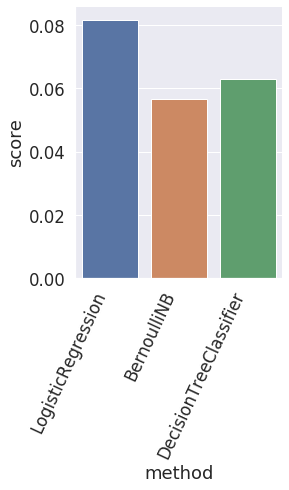

In [440]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)

# clf = BaggingClassifier(base_estimator=SVC(),
#                          n_estimators=10, random_state=0).fit(X, y)


# Зададим параметры решающего дерева
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train, y_train)
y_test_pred=bag_model.predict(X_test) # предсказание
print(bag_model.score(X_test, y_test))
# print(confusion_matrix(y_test, y_test_pred)) 

# Используем разные методы
lr = LogisticRegression();
bnb = BernoulliNB()
# gnb = GaussianNB() # Данный метод не используется, так как "Weights sum to zero, can't be normalized"

base_methods=[lr, bnb, dtc] #gnb,
scores = []
output_method_names = []

# Пройдёмся по разным методам и отобразим из точность
for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train, y_train)
 y_test_pred=bag_model.predict(X_test)
 print('\n',classification_report(y_test, y_test_pred))
 model_score = bag_model.score(X_test, y_test)
 print('Score: ', model_score)
 scores.append(model_score)

#  print(confusion_matrix(y_test, y_test_pred)) 

for bm in base_methods:
  name, _ = str(bm).split('(')
  output_method_names.append(name)

scores_df = pd.DataFrame(list(zip(output_method_names, scores)), 
                         columns=['method', 'score'])

print(scores_df) #Наш датафрейм для красивого отображения
    
# Отобразим график алгоритма к его оценке
chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df);

chart.set_xticklabels(rotation=65, horizontalalignment='right')


# Рассмотрим Random Forest реализацию

In [0]:
# Импорт модели, которую будем использовать
from sklearn.ensemble import RandomForestRegressor
# Инстанциируем модель с 1000 деревьями решений
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Натренируем модель на train данных
rf.fit(X_train, y_train);

In [442]:
# Используем метод предсказания 'леса' на тестовых данных
predictions = rf.predict(X_test)
# Высчитаем абсолютные ошибки
errors = abs(predictions - y_test)
# Высчитаем среднюю абсолютную ошибку (mae)
print('Average Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Average Absolute Error: 2272.71 degrees.


In [443]:
# Высчитаем среднюю абсолютную ошибку (MAPE)
mape = 100 * (errors / y_test)
# Высчитаем и отобразим точность
accuracy = 100 - np.mean(mape)
print(mape)
print(accuracy)
# Выкинем nan
print('Accuracy:', round(accuracy, 2), '%.')

[3.60069112e+01            nan 8.72250000e+00 3.92918872e+00
 7.20555948e+00 6.88449805e+00 9.36906141e+00 2.75137155e+01
 2.53911477e+00 1.03065782e+01 3.04427379e+00 2.06778250e+00
 6.01591512e-01 2.10472985e+01 1.87896552e+01            nan
 5.02196359e+00 2.82240252e+00 9.67614631e+00 1.82430127e+01
 5.78573326e+00 6.65640074e+00 6.45864708e+00 1.01129140e+01
 7.53230763e+00            nan 4.29901998e+00 6.37390476e+01
 6.90347862e+00 1.62516195e+01 1.56201931e+01 2.77835803e+00
 1.27594069e+00 8.95844958e+00 1.22343407e+01 1.59135930e+00
 2.10099612e-01 3.20359956e+01 6.31232877e-01 7.93040173e+00
 1.90861164e+01 2.72121212e+00 1.38095657e+00 2.07307839e+01
 2.48842078e+00 1.85124095e+01 5.45206103e+00 1.19373830e+01
 6.31514174e+00 1.14207973e+01 6.66707104e+00 2.50591145e+01
 6.57191837e+01 1.37503933e+01 1.11988090e+00 3.74698711e+00
 3.56983788e+00 6.47778846e+01 4.19591505e+00 1.95860919e+00
 2.16983838e+00 2.69217238e+00            inf 2.21379498e+00
 2.58074259e+00 6.047600

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [444]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

errors = abs(y_pred - y_test)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape = np.mean(100 * (errors / y_test))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

Average absolute error:  2304.49 degrees.
Mean Asolute Percentage Error
Mean Absolute Error: 2304.492741090146
Mean Squared Error: 23697633.28187654
Root Mean Squared Error: 4868.021495625973


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


# Построим KNN алгоритм

In [445]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Объявем кнн классификатор
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 40), dtype='int')} 

#Зададим параметры кросс валидации
gs = GridSearchCV(knn, knn_grid, cv=12)
gs.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=12, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  1,  2,  3,  4,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 12, 13,
       14, 15, 16, 16, 17, 18, 19, 20, 20, 21, 22, 23, 24, 24, 25, 26, 27,
       28, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 36, 37, 38, 39, 40])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# Зададим функцию отрисовки
def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

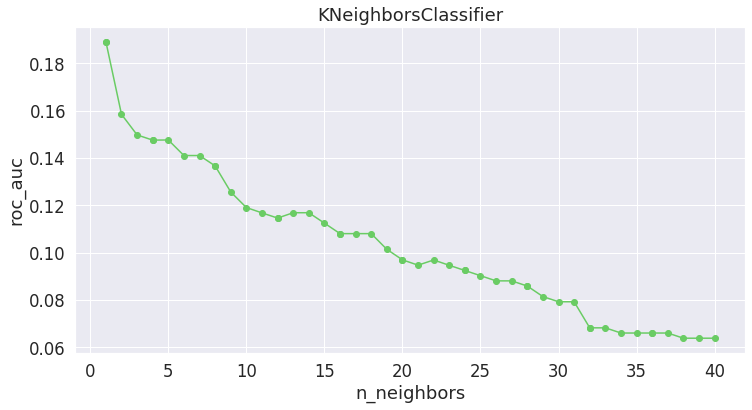

In [447]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [448]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 1} 0.18918918918918917


In [452]:
knn = KNeighborsClassifier(n_neighbors=1) #gs.best_model
clf_knn = knn.fit(X_train, y_train)

y_knn = clf_knn.predict(X_test)
y_knn

array([ 62282,      0,    128,   7273,   2068,  19842,  16581,   4915,
        26724,  47282,  93127,  11606,   1885,   5909,      0,      0,
        28524,   4149,  49163,  21199,  53907,   3773,  38482,   5798,
        19842,      0,  73335,      0,   7145,   2848,   1725,  27306,
        29758,   5673,   3276,   3777,  64896,  35506,    718, 173114,
         5904,  21215,  32231,  62282,   3873,  13412,  18313, 119846,
        38482,   1505, 164402,  49163,      0,   5328,  91324,  53907,
        14024,      0,  40968,   3777,  34499,  16834,      0,   1862,
       128522,      0,  38482,      0, 150281,   4251,   1185,   2152,
         1217,  21841,   1609,   2548, 136510,      0, 119846,  35237,
         4149,   8206,  10983,   4915,  66545,     24,   1153,  16581,
         4812,   1725,  87288,   8944,  55852,    261,  27569,    544,
       135915,  66545,   2148,  14716,    742,   3803,  33469,  89765,
        13184,   4563,   2745,  13184, 119846,  34259,   5328, 137809,
      

In [453]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), '\n')
print(metrics.classification_report(y_test, y_knn))

knn = 0.11949685534591195 

              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
          24       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         0
         175       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         2
         261       0.00      0.00      0.00         0
         301       0.00      0.00      0.00         2
         544       0.00      0.00      0.00         0
         568       0.00      0.00      0.00         1
         585       0.00      0.00      0.00         0
         718       0.00      0.00      0.00         0
         730       0.00      0.00      0.00         1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
# Параметры f1 метрики
print('macro = ', metrics.f1_score(y_test, y_knn, average='macro'), ', micro = ', metrics.f1_score(y_test, y_knn, average='micro'))

macro =  0.03991596638655462 , micro =  0.11949685534591195


# Попробуем воспользоваться нейросетевым подходом

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # Для чистого/простого сброса состояния notebook.


In [0]:
from tensorflow import keras
from tensorflow.keras import layers

# Подготовим данные для модели
inputs = keras.Input(shape=(10), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(600000, activation='softmax', name='predictions')(x)

# Поместим данные в модель
model = keras.Model(inputs=inputs, outputs=outputs)


In [458]:
# Специфицируем обучающую конфигурацию метрики, потери, оптимизатор
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model.fit(x=X, y=y, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:4])
print('predictions shape:', predictions.shape)


# Fit model on training data
Train on 454 samples
454/454 [==============================] - 12s 25ms/sample - loss: 13.2453 - sparse_categorical_accuracy: 0.0551

history dict: {'loss': [13.245344439267061], 'sparse_categorical_accuracy': [0.05506608]}

# Evaluate on test data
454/454 [==============================] - 4s 9ms/sample - loss: 12.9255 - sparse_categorical_accuracy: 0.0617
test loss, test acc: [12.925549271873441, 0.06167401]

# Generate predictions for 3 samples
predictions shape: (4, 600000)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# import log
# logging.basicConfig(filename="sample.log", level=logging.INFO)
# log = logging.getLogger()

# config = tf.ConfigProto(
#     device_count={'GPU': 1},
#     intra_op_parallelism_threads=1,
#     allow_soft_placement=True
# )

# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.6

# session = tf.Session(config=config)

# keras.backend.set_session(session)

# seatbelt_model = keras.models.load_model(filepath='./seatbelt.h5')

# SEATBEL_INPUT_SHAPE = (-1, 120, 160, 1)

# def predict_seatbelt(image_arr):
#     try:
#         with session.as_default():
#             with session.graph.as_default():
#                 image_arr = np.array(image_arr).reshape(SEATBEL_INPUT_SHAPE)
#                 predicted_labels = seatbelt_model.predict(image_arr, verbose=1)
#                 return predicted_labels
#     except Exception as ex:
#         log.log('Seatbelt Prediction Error', ex, ex.__traceback__.tb_lineno)

In [460]:
# Скормим keras модели наши данные

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.35, random_state=0)
model.fit(X_train_keras, y_train_keras, epochs=100, batch_size=10) # Сделаем колличество эпох обучения 100 и посмотрим как обучится модель

Epoch 1/100


InvalidArgumentError: ignored

In [0]:
# Отобразим точность модели
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Итог у нас имеется огромный loss на нейросетевом подходе и некорректный shape в логистической регрессией с подходом кроссвалидации.
Возможно не очень хорошие данные.

При последующих тестированиях я смог получить Tensor metrics_2/acc/Mean_1:0, specified in either feed_devices or fetch_devices was not found in the Graph и пока не получается решить данную проблему.


Требуется дополнить данные пользователями их трендами и другими данными. Найти другие источники данных. Дополнить датасет, оптимизировать и пройтись по шагам заново, модифицируя модели.